### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/feruzkholov/Downloads/train.csv')

#### Now, let's explore the dataset by checking the first few rows, column names, data types, and missing values:


In [3]:
# checking first 5 rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# checking column names
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
# checking data types
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Check missing values
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Now, let's perform some data cleaning and wrangling:

In [7]:
# dropping unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
# filling missing values in "Age" column with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [9]:
# filling missing values in "Embarked" column with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# checking missing values again
print(df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### Now, let's perform some exploratory data analysis:

In [10]:
# summary statistics of the dataset
print(df.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


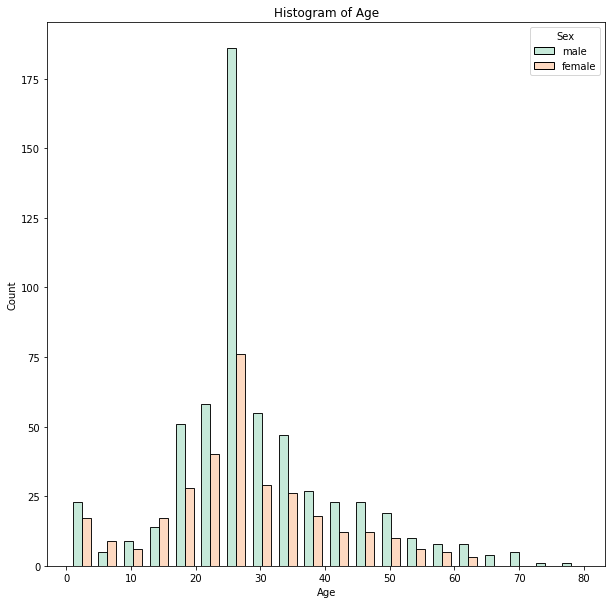

In [11]:
# Histogram of "Age" column
plt.figure(figsize=(10,10))
sns.histplot(df,x='Age', bins=20,hue='Sex',multiple='dodge', shrink=.7,palette='Pastel2')
plt.title('Histogram of Age')
plt.show()

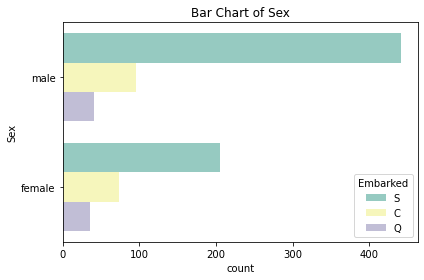

In [15]:
# Bar chart of "Sex" column
sns.countplot(y='Sex', data=df, hue='Embarked', palette='Set3')
plt.title('Bar Chart of Sex') 
plt.tight_layout()
plt.show()

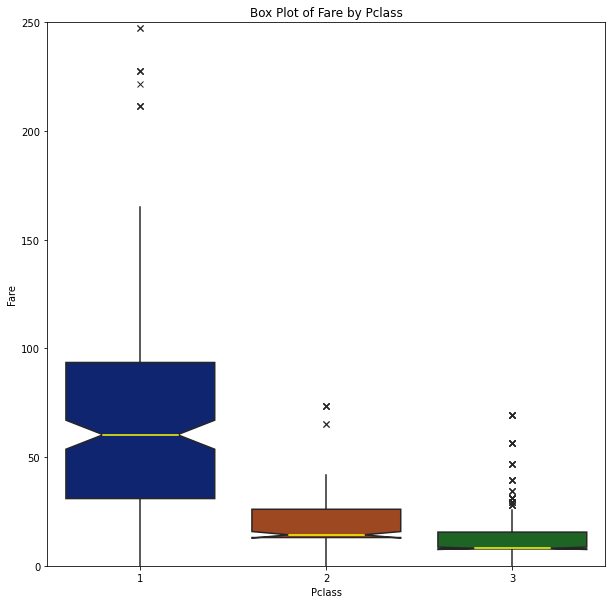

In [13]:
# Box plot of "Fare" column by "Pclass"
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='dark',notch=True, showcaps=False,
    flierprops={"marker": "x"},medianprops={"color": "yellow"},fliersize=6)
plt.ylim(0,250)
plt.title('Box Plot of Fare by Pclass')
plt.show()

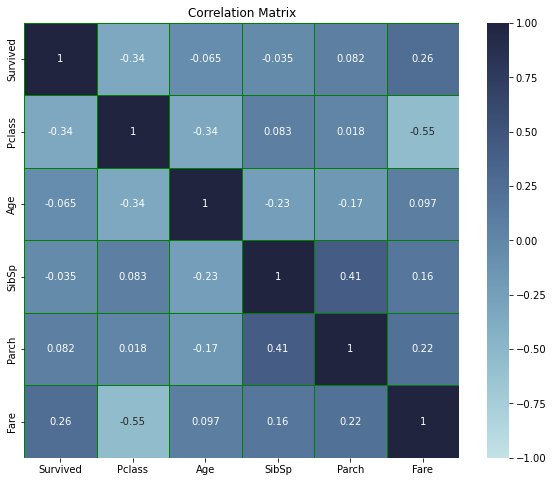

In [14]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,linewidth=.5, square=True, linecolor='green', cmap=sns.cubehelix_palette(as_cmap=True,rot=-.2),vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()